In [1]:
import numpy as np
import scipy.stats as sps

import matplotlib.pyplot as plt

## Likelihood intuition

In [2]:
# Setting the stage
N = 50
mu_true = 5
sigma_true = 3

# Range of model parameters to explore
mu_min, mu_max = mu_true-3*sigma_true, mu_true+3*sigma_true
sigma_min, sigma_max = 0.5*sigma_true, 1.5*sigma_true

# Drawing some samples
my_gaussian = sps.norm(loc=mu_true, scale=sigma_true)
samples = my_gaussian.rvs(N)

In [3]:
# Add noise for fun, if you want
add_contamination = False
if add_contamination:
    samples = np.concatenate((samples, np.random.uniform(low=mu_true, high=2.*mu_true, size=int(0.2*N))))

In [4]:
# Likelihood function
def my_lh(params):
    _mu, _sigma = params
    return np.sum(sps.norm.logpdf(samples, loc=_mu, scale=_sigma))

# Scan over a range of mu's
mu_arr = np.linspace(mu_min, mu_max, 100)
lh_arr = np.array([my_lh([_mu, sigma_true]) for _mu in mu_arr])

# MLE for Gaussian
mu_mle = np.mean(samples)
sigma_mle = np.std(samples)

In [5]:
# Show PDF for a few different mu's
mu_show = {'True': mu_true,
          'MLE': mu_mle,
          'Totally wrong': 0.3,}

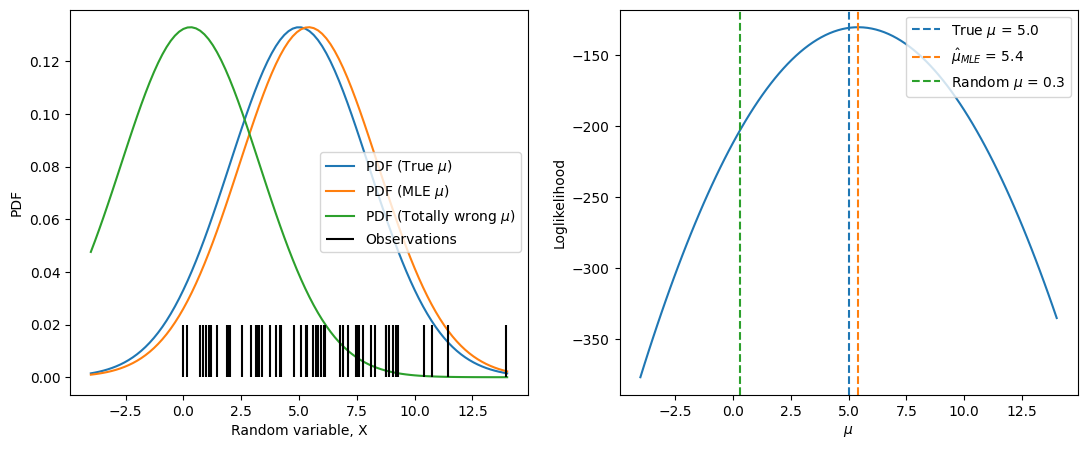

In [6]:
plt.figure(figsize=(13, 5))

plt.subplot(121)
yy = my_gaussian.pdf(mu_arr)

xx = np.linspace(mu_min, mu_max, 100) # range of x to show
yy = {}
for _label, _mu in mu_show.items():
    _yy = sps.norm.pdf(xx, loc=_mu, scale=sigma_true)
    yy[_label] = _yy
    plt.plot(xx, _yy, label=f'PDF ({_label} $\mu$)')
    
plt.vlines(samples, ymin=0, ymax=0.02, color='k', label='Observations')
plt.legend()
plt.xlabel('Random variable, X')
plt.ylabel('PDF')

plt.subplot(122)
plt.plot(mu_arr, lh_arr)
plt.axvline(mu_show['True'], ls='--', color='C0', label=f'True $\mu$ = {mu_show["True"]:.1f}')
plt.axvline(mu_show['MLE'], ls='--', color='C1', label=f'$\hat{{\mu}}_{{MLE}}$ = {mu_show["MLE"]:.1f}')
plt.axvline(mu_show['Totally wrong'], ls='--', color='C2', label=f'Random $\mu$ = {mu_show["Totally wrong"]:.1f}')
plt.xlabel('$\mu$')
plt.ylabel('Loglikelihood')
plt.legend(loc='upper right')

## MLE asymptotic distribution
Taking MLE for the expectation of a Gaussian r.v. as an example,
\begin{align}
N\rightarrow\infty,\qquad \hat{\mu}_{MLE}\sim\mathcal{N}\left(\mu,\frac{\sigma^2}{N}\right)
\end{align}
where $\mu$ is the true mean of the Gaussian, $\sigma^2$ is the true variance of the Gaussian, and $N$ is the sample size.

In [16]:
n_mc = 100 # number of MC trials
N = 5 # number of samples per trial, sampel size

# Draw some samples, going to do this one shot in a vectorized way instead of in a for loop
mu_true = 5
sigma_true = 3
my_gaussian2 = sps.norm(loc=mu_true, scale=sigma_true)
samples = my_gaussian2.rvs(size=(N, n_mc))
print(f'`samples` is a {np.shape(samples)} array')

# Recall that MLE for mu is just sample mean
mle_mu = np.mean(samples, axis=0)
print(f'`mle_mu` is a {np.shape(mle_mu)} array')

`samples` is a (5, 100) array
`mle_mu` is a (100,) array


In [20]:
def run_experiments(N, # number of samples per trial, sample size
                    mu_true, sigma_true,
                    n_mc = 1000 # number of pseudo-experiments or MC trials
                   ):
    ''' I ran out of function names..'''

    # Draw some samples, going to do this one shot in a vectorized way instead of in a for loop
    my_gaussian2 = sps.norm(loc=mu_true, scale=sigma_true)
    samples = my_gaussian2.rvs(size=(N, n_mc))
    
    # Recall that MLE for mu is just sample mean
    mle_mu = np.mean(samples, axis=0)

    return mle_mu    

Text(0, 0.5, 'PDF')

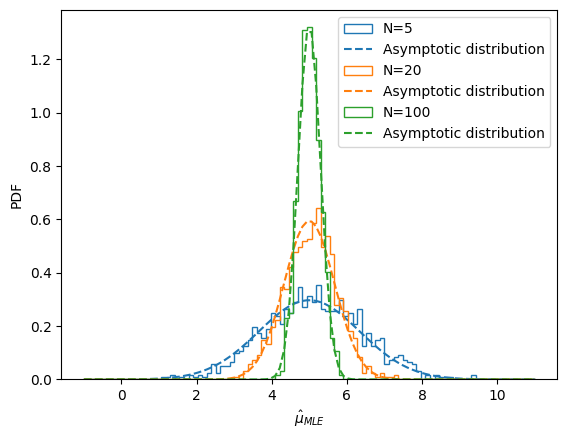

In [40]:
# For histogramming MLE later
nbins = 100
min_mu, max_mu = mu_true-2*sigma_true, mu_true+2*sigma_true
bin_edges = np.linspace(min_mu, max_mu, nbins)

# Trying out different sample sizes
N_arr = np.array([5, 20, 100])

mle_bag = {}
for _ii, _N in enumerate(N_arr):
    mle_bag[_N] = run_experiments(_N,
                                 mu_true, sigma_true,)
    plt.hist(mle_bag[_N], bins=bin_edges, histtype='step', label=f'N={_N}', density=True, color=f'C{_ii}')

    # overlaying with Gaussian for comparison
    _yy = sps.norm.pdf(bin_edges, loc=mu_true, scale=sigma_true/np.sqrt(_N))
    plt.plot(bin_edges, _yy, color=f'C{_ii}', ls='--', label='Asymptotic distribution')
plt.legend()
plt.xlabel(f'$\hat{{\mu}}_{{MLE}}$')
plt.ylabel('PDF')

In [42]:
3686.56-2097-1281.06


308.5